<a href="https://colab.research.google.com/github/ShahriarAlomShakil/Temperature_Prediction_2202043_Shahriar_Alom_Batch_49_01/blob/main/Temperature_Prediction_2202043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
excel_file = pd.ExcelFile('/content/air_quality_index_dataset.xlsx')
print(excel_file.sheet_names)

['Sangsad ', 'BARC', 'Darussalam', 'Gazipur', 'Narayonganj', 'TV st-Chittagong', 'Agrabad Chittagong', 'Sylhet', 'Khulna', 'Rajshahi', 'Barishal', 'Savar', 'Rangpur', 'Mymansingh', 'Cumilla', 'Narsingdi']


In [116]:
sylhet_df = excel_file.parse('Sylhet')
display(sylhet_df.head())

,Date,Time,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,PM2.5,PM10,Wind Speed,Wind Dir,Temperature,RH,Solar Rad,BP,Rain,V Wind Speed
0,2012-11-01 00:00:00,01:00,NaN,4.55,7.56,12.15,NaN,NaN,1.06,NaN,27.87,31.03,3.58,203.18,25.22,84.16,7.11,1092.60,0.03,1.35
1,2012-11-01 00:00:00,02:00,NaN,3.41,5.12,8.55,NaN,NaN,1.87,NaN,24.03,31.89,3.22,185.72,24.82,82.08,7.19,1092.21,0.03,1.29
2,2012-11-01 00:00:00,03:00,NaN,2.87,3.36,6.25,NaN,NaN,2.66,NaN,24.84,29.00,3.32,194.05,24.26,82.41,7.11,1092.01,0.02,1.31
3,2012-11-01 00:00:00,04:00,NaN,NaN,2.84,5.63,NaN,NaN,2.97,NaN,20.00,28.69,3.23,193.50,23.86,76.52,7.11,1092.13,0.03,1.28
4,2012-11-01 00:00:00,05:00,NaN,2.93,3.97,6.93,NaN,NaN,2.54,NaN,20.09,19.13,2.91,186.90,23.71,72.33,7.42,1092.50,0.02,1.24


In [117]:
sylhet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80064 entries, 0 to 80063
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          80064 non-null  object 
 1   Time          71592 non-null  object 
 2   SO2           27682 non-null  float64
 3   NO            55570 non-null  float64
 4   NO2           55812 non-null  float64
 5   NOX           56968 non-null  object 
 6   CO            44791 non-null  float64
 7   CO 8hr        44484 non-null  float64
 8   O3            40521 non-null  float64
 9   O3 8hr        37637 non-null  float64
 10  PM2.5         50563 non-null  float64
 11  PM10          51734 non-null  float64
 12  Wind Speed    53602 non-null  float64
 13  Wind Dir      52485 non-null  float64
 14  Temperature   53196 non-null  float64
 15  RH            53386 non-null  float64
 16  Solar Rad     53374 non-null  float64
 17  BP            48310 non-null  float64
 18  Rain          28892 non-nu

In [118]:
sylhet_df.isnull().sum()

,0
Date,0
Time,8472
SO2,52382
NO,24494
NO2,24252
NOX,23096
CO,35273
CO 8hr,35580
O3,39543
O3 8hr,42427


In [119]:
sylhet_df.isnull()

,Date,Time,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,PM2.5,PM10,Wind Speed,Wind Dir,Temperature,RH,Solar Rad,BP,Rain,V Wind Speed
0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80059,False,True,True,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True
80060,False,True,True,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True
80061,False,True,True,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True
80062,False,True,True,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True


In [120]:
sylhet_df = sylhet_df.dropna()
sylhet_df.shape

(2691, 20)

In [121]:
# separating numerical features and categorical features
num_cols = sylhet_df.select_dtypes(include=[np.number]).columns
cat_cols = sylhet_df.select_dtypes('object').columns

# Ensure categorical columns are strings
for col in cat_cols:
    sylhet_df[col] = sylhet_df[col].astype(str)

# Ensure numerical columns are float64
for col in num_cols:
    sylhet_df[col] = sylhet_df[col].astype(np.float64)

print(num_cols)
print(cat_cols)

Index(['SO2', 'NO', 'NO2', 'CO', 'CO 8hr', 'O3', 'O3 8hr', 'PM2.5', 'PM10',
       'Wind Speed', 'Wind Dir', 'Temperature', 'RH', 'Solar Rad', 'BP',
       'Rain', 'V Wind Speed'],
      dtype='object')
Index(['Date', 'Time', 'NOX'], dtype='object')


In [122]:
train , test = train_test_split(sylhet_df, test_size=0.2, random_state=42)

train_data , val_data = train_test_split(train, test_size=0.2, random_state=42)

In [123]:
#prepare features and target
X_train = train_data.drop(columns=['Temperature'])
y_train = train_data['Temperature']
X_val = val_data.drop(columns=['Temperature'])
y_val = val_data['Temperature']
X_test = test.drop(columns=['Temperature'])
y_test = test['Temperature']

In [124]:
# imputing missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Drop 'Temperature' column from num_cols if it exists
num_cols = num_cols.drop('Temperature', errors='ignore')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

In [125]:
# scaling numerical features and encoding categorical features
scaler = StandardScaler()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_val[cat_cols] = encoder.transform(X_val[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

In [126]:
#Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [127]:
#evaluate model
y_val_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: {rmse}")
print(f"Validation R²: {r2}")

Validation RMSE: 0.9502958659860784
Validation R²: 0.9478076594253594


In [128]:
# Test model
y_test_pred = model.predict(X_test)
test_rmse =mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse}")
print(f"Test R²: {test_r2}")

Test RMSE: 1.3749895215955483
Test R²: 0.9354225465264306


In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


0.8582475657513147

In [130]:
#predicting temperature from a single row of data

s_df = sylhet_df.head(1)

X = s_df.drop(columns=['Temperature'])
X[num_cols] = scaler.transform(X[num_cols])
X[cat_cols] = encoder.transform(X[cat_cols])

y = model.predict(X)

print(y)

[23.5436]


In [139]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(X_test)
error = mse(y_test, predicted) ** .5
print(error)


1.7372987191379434


In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(X_train,y_train)
    name = type(model).__name__
    score = model.score(X_test,y_test)*100
    errors[name] = score

In [141]:
errors

{'RandomForestRegressor': 93.36629074000395,
 'DecisionTreeRegressor': 91.06756549435518,
 'LinearRegression': 85.82475657513146}

<BarContainer object of 3 artists>

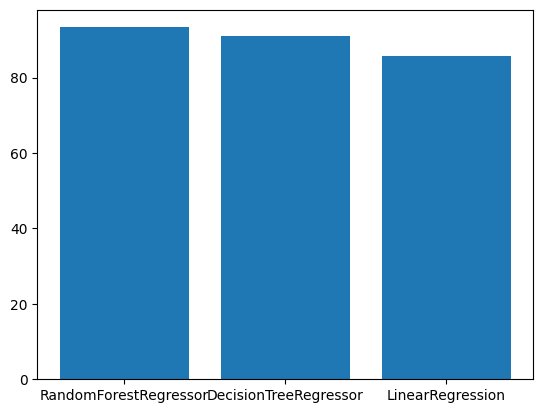

In [142]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())

/tmp/ipython-input-120495182.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


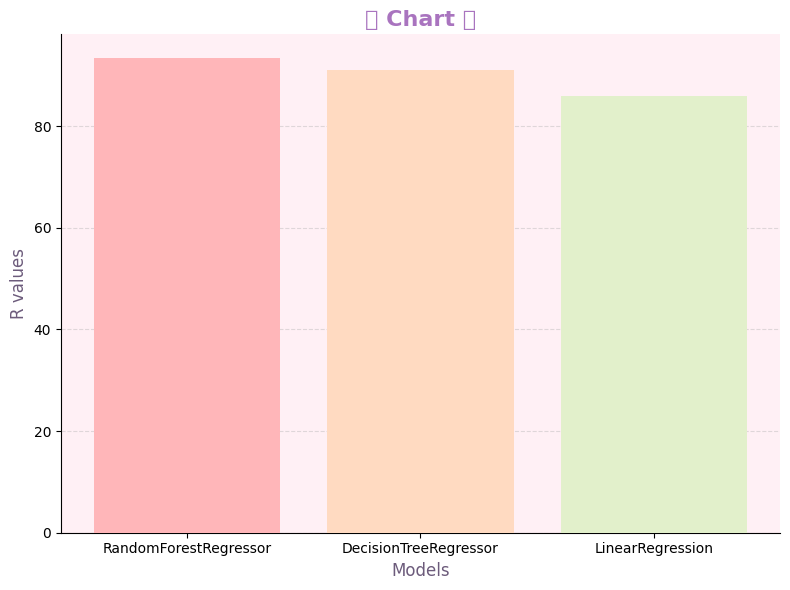

In [143]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
